# **Data preprocessing for Food Ingredient Image Classification**

This  notebook demonstrates loading a dataset, visualizing images, and preprocessing them using MobileNetV2. 

### **Importing necessary libraries**

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import image_dataset_from_directory
from keras.applications.mobilenet_v2 import preprocess_input

### **Define image dimensions**

In [ ]:
img_width=224
img_height=224

### **Image dataset preparation**

In [ ]:
# Dataset for validation
val_ds = image_dataset_from_directory(
    directory=os.path.join('converted_img', 'valid'),  # Directory containing validation images
    image_size=(img_height, img_width),  # Size of the images
    batch_size=32,  # Batch size for training
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='int',  # Labels are integers
)

# Dataset for testing
test_ds = image_dataset_from_directory(
    directory=os.path.join('converted_img', 'test'),  # Directory containing test images
    image_size=(img_height, img_width),  # Size of the images
    batch_size=32,  # Batch size for testing
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='int',  # Labels are integers
)

# Dataset for training
train_ds = image_dataset_from_directory(
    directory=os.path.join('converted_img', 'train'),  # Directory containing training images
    image_size=(img_height, img_width),  # Size of the images
    batch_size=32,  # Batch size for training
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='int',   # Labels are integers
)

Found 820 files belonging to 82 classes.
Found 820 files belonging to 82 classes.
Found 2460 files belonging to 82 classes.


### **Extract class names from validation dataset**

In [ ]:
data_cat=val_ds.class_names

### **Visualizing validation images with labels**

2024-04-24 05:54:48.235022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:54:48.235100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:54:48.235212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:54:48.237636: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:54:48.244344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:54:48.245017: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:54:48.249455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:54:48.250761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:54:48.255563: W tensorflow/core/lib/png/png_io.cc:89] PNG 

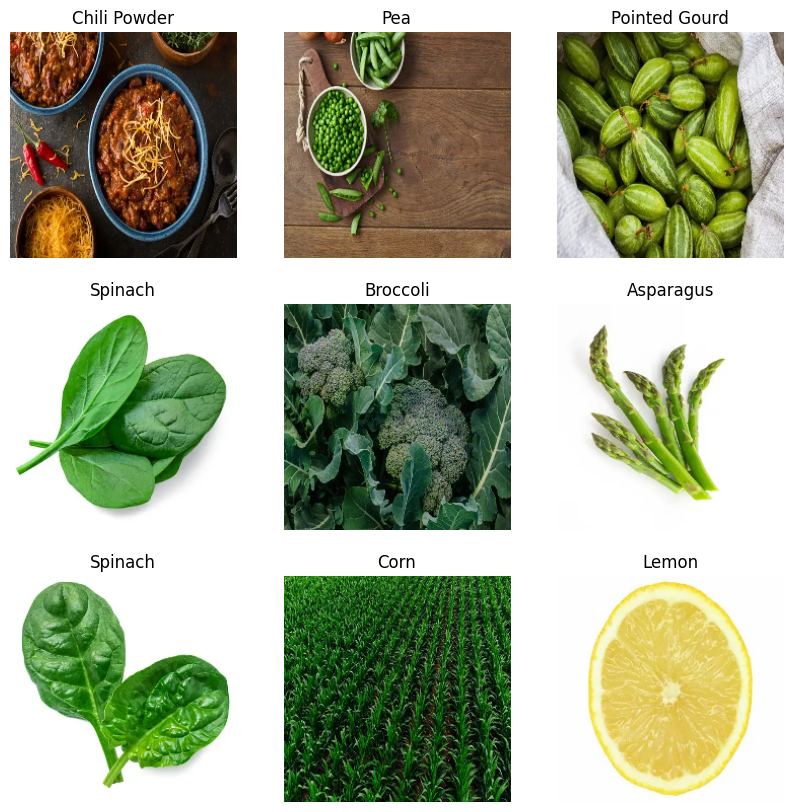

In [ ]:
# Create a figure with a size of 10x10 inches
plt.figure(figsize=(10,10))

# Iterate through the first batch of images and labels in the validation dataset
for image, labels in val_ds.take(1):
    # Iterate through 9 images in the batch
    for i in range(0, 9):
        # Create subplots in a 3x3 grid
        plt.subplot(3, 3, i+1)

        # Display the image as a numpy array and convert it to unsigned 8-bit integers
        plt.imshow((image[i]).numpy().astype("uint8"))

        # Set the title of the subplot to the corresponding label from data_cat
        plt.title(data_cat[labels[i]])

        # Turn off the axis for better visualization
        plt.axis('off')

# Show the plot
plt.show()

### **Normalize the validation, train and test iamges**

In [ ]:
# Preprocess the images
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

### **After normalizing, checking validation images**

2024-04-24 05:55:06.802485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:55:06.802585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:55:06.802910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:55:06.805131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:55:06.810975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:55:06.811717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:55:06.813144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:55:06.814749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 05:55:06.821145: W tensorflow/core/lib/png/png_io.cc:89] PNG 

[[[ 0.30196083  0.27058828  0.26274514]
  [ 0.29478288  0.26341033  0.2555672 ]
  [ 0.22535014  0.17044818  0.17377448]
  ...
  [ 0.9529412   0.9529412   0.9529412 ]
  [ 0.90156174  0.90156174  0.90156174]
  [ 0.78566265  0.78566265  0.78566265]]

 [[ 0.30196083  0.27058828  0.26274514]
  [ 0.29478288  0.26341033  0.2555672 ]
  [ 0.22535014  0.17044818  0.17377448]
  ...
  [ 0.9529412   0.9529412   0.9529412 ]
  [ 0.9144263   0.9144263   0.9144263 ]
  [ 0.8253535   0.8253535   0.8253535 ]]

 [[ 0.30196083  0.27058828  0.26274514]
  [ 0.29478288  0.26341033  0.2555672 ]
  [ 0.22535014  0.17044818  0.17377448]
  ...
  [ 0.9462105   0.9462105   0.9462105 ]
  [ 0.92095625  0.92095625  0.92095625]
  [ 0.8533753   0.8533753   0.8533753 ]]

 ...

 [[ 0.5454484   0.48065495  0.4492824 ]
  [ 0.5638981   0.49380136  0.4624288 ]
  [ 0.5559095   0.49039698  0.4560132 ]
  ...
  [-0.18880373 -0.4289412  -0.61154664]
  [-0.16488111 -0.40000147 -0.60614216]
  [-0.14919484 -0.4001752  -0.598302  ]]

 [

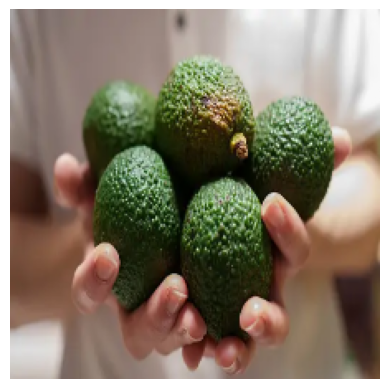

In [ ]:
for image,labels in val_ds.take(1):
  """
    Iterate through the first batch of images in the validation dataset and visualize them.

    Args:
        image (tensor): The tensor containing the batch of images.
        labels (tensor): The tensor containing the corresponding labels for the images.

    Returns:
        None
    """

  for i in range(0,1):
    print((image[i]).numpy())
    print('----------------------------------\n')
    plt.imshow((image[i].numpy() + 1) / 2)
    plt.axis('off')
    print((data_cat[labels[i]]))